In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import itertools
from tqdm import tqdm
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
df = pd.read_csv('logP.csv')
df

,Unnamed: 0,smiles,logP,QED_score,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,COc1ccccc1[C@@H]1CC(=O)Nc2cc(C)c(C)cc21,4.17,0.909,12.053455,12.053455,0.045556,0.045556,0.909253,281.355,...,0,0,0,0,0,0,0,0,0,0
1,1,COc1ccc2c(c1)O[C@](O)(C(F)(F)F)CC2=O,2.79,0.839,12.616874,12.616874,0.009514,-5.052156,0.839542,262.183,...,0,0,0,0,0,0,0,0,0,0
2,2,C=C(c1ccc(N(C)C)cc1)c1ccc(N(C)C)cc1,5.30,0.828,4.217020,4.217020,1.056122,1.056122,0.828333,266.388,...,0,0,0,0,0,0,0,0,0,0
3,3,Cc1ccc([C@@H](O)C#CC(O)(c2ccccc2)c2ccccc2)o1,3.53,0.726,11.239605,11.239605,0.364327,-1.508792,0.726080,318.372,...,0,0,0,0,0,0,0,0,0,0
4,4,CC(C)(C)c1cc(Cc2ccccc2)n[nH]1,4.35,0.816,4.352931,4.352931,0.140811,0.140811,0.816043,214.312,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,Cc1cccc(NC(=O)C[C@@H]2S/C(=N\c3c(C)cccc3C)N(C)...,4.75,0.863,12.562081,12.562081,0.093167,-0.455663,0.863227,381.501,...,1,0,0,0,0,0,0,0,0,0
240,240,CCOc1ccccc1OCC(=O)Nc1ccc2ccccc2c1,4.73,0.737,12.114099,12.114099,0.072506,-0.211498,0.737878,321.376,...,0,0,0,0,0,0,0,0,0,0
241,241,OCC#CC(O)(c1ccc(F)cc1)c1ccc(F)cc1,3.61,0.824,12.974979,12.974979,0.339313,-1.732014,0.824192,274.266,...,0,0,0,0,0,0,0,0,0,0
242,242,CC(=O)Nc1ccc(/N=C/c2c([O-])oc3ccccc3c2=O)cc1,3.64,0.750,12.347197,12.347197,0.125336,-0.724707,0.750035,321.312,...,0,0,0,0,0,0,0,0,0,0


In [3]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [4]:
y = df.logP
X = df.iloc[:, 3:]
feats = X.columns
X


,QED_score,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.909,12.053455,12.053455,0.045556,0.045556,0.909253,281.355,262.203,281.141579,108,...,0,0,0,0,0,0,0,0,0,0
1,0.839,12.616874,12.616874,0.009514,-5.052156,0.839542,262.183,253.111,262.045293,98,...,0,0,0,0,0,0,0,0,0,0
2,0.828,4.217020,4.217020,1.056122,1.056122,0.828333,266.388,244.212,266.178299,104,...,0,0,0,0,0,0,0,0,0,0
3,0.726,11.239605,11.239605,0.364327,-1.508792,0.726080,318.372,300.228,318.125594,120,...,0,0,0,0,0,0,0,0,0,0
4,0.816,4.352931,4.352931,0.140811,0.140811,0.816043,214.312,196.168,214.146999,84,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.863,12.562081,12.562081,0.093167,-0.455663,0.863227,381.501,358.317,381.151098,140,...,1,0,0,0,0,0,0,0,0,0
240,0.737,12.114099,12.114099,0.072506,-0.211498,0.737878,321.376,302.224,321.136493,122,...,0,0,0,0,0,0,0,0,0,0
241,0.824,12.974979,12.974979,0.339313,-1.732014,0.824192,274.266,262.170,274.080536,102,...,0,0,0,0,0,0,0,0,0,0
242,0.750,12.347197,12.347197,0.125336,-0.724707,0.750035,321.312,308.208,321.088080,120,...,0,0,0,0,0,0,0,0,0,0


## KBest without cv

In [5]:
def feature_selection(X, y, features: list, n_features = 2):

    r2_values = []

    for n_feat in range(1, n_features+1):

        combs = itertools.combinations(features, n_feat)

        for feature_subset in combs:

            model = linear_model.LinearRegression()

            X_train = X[[*feature_subset]]

            model.fit(X_train, y)
            r2_value = model.score(X_train, y)

            r2_values.append((n_feat, r2_value, ' '.join(feature_subset)))

    r2_df = pd.DataFrame(r2_values, columns=['n', 'r2', 'cols'])

    return r2_df.groupby('n').max()


In [6]:
selector = SelectKBest(f_regression, k = 50)
study = selector.fit_transform(X, y)
selected_feature_indices = selector.get_support()
selected_feature_names = X.columns[selected_feature_indices]
X_new = pd.DataFrame(study, columns = selected_feature_names)
X_new

,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,AvgIpc,BalabanJ,...,VSA_EState6,HeavyAtomCount,NumAliphaticCarbocycles,NumAliphaticRings,NumAromaticCarbocycles,RingCount,MolMR,fr_ArN,fr_aryl_methyl,fr_benzene
0,281.355,262.203,281.141579,108.0,9.826610,2.283329,-2.277418,2.409873,2.479817,2.167149,...,12.173224,21.0,0.0,1.0,2.0,3.0,83.9997,0.0,2.0,2.0
1,262.183,253.111,262.045293,98.0,9.976269,2.595214,-2.338667,2.417638,2.260441,2.466824,...,3.854776,18.0,0.0,1.0,1.0,2.0,53.5743,0.0,0.0,1.0
2,266.388,244.212,266.178299,104.0,9.988563,2.037722,-2.148481,2.248038,2.463877,2.219002,...,16.969155,20.0,0.0,0.0,2.0,2.0,89.6740,0.0,0.0,2.0
3,318.372,300.228,318.125594,120.0,9.864935,2.289913,-2.232562,2.289585,3.072296,2.024811,...,21.820029,24.0,0.0,0.0,2.0,3.0,92.0636,0.0,1.0,2.0
4,214.312,196.168,214.146999,84.0,9.917986,2.159146,-2.141439,2.206135,2.671659,2.150835,...,12.581179,16.0,0.0,0.0,1.0,2.0,66.5357,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,381.501,358.317,381.151098,140.0,10.109655,2.366746,-2.103953,2.324511,2.859261,1.720645,...,13.598590,27.0,0.0,1.0,2.0,3.0,111.5857,0.0,3.0,2.0
240,321.376,302.224,321.136493,122.0,10.109605,2.076714,-2.115232,2.259625,2.610351,1.626537,...,21.145723,24.0,0.0,0.0,3.0,3.0,95.6837,0.0,0.0,3.0
241,274.266,262.170,274.080536,102.0,9.866062,2.290398,-2.231605,2.289251,2.459367,2.551777,...,10.369830,20.0,0.0,0.0,2.0,2.0,70.6606,0.0,0.0,2.0
242,321.312,308.208,321.088080,120.0,10.152994,2.044913,-2.091641,2.192387,2.554374,1.929950,...,13.230576,24.0,0.0,0.0,2.0,3.0,89.9297,0.0,0.0,2.0


In [7]:
feats2 = X_new.columns

In [8]:
res = feature_selection(X_new, y, feats2)
res

,r2,cols
n,,
1,0.328713,fr_benzene
2,0.398446,fr_aryl_methyl fr_benzene


In [8]:
res22 = feature_selection(X_new, y, feats2, 3)
res22

,r2,cols
n,,
1,0.328713,fr_benzene
2,0.398446,fr_aryl_methyl fr_benzene
3,0.442516,fr_ArN fr_aryl_methyl fr_benzene


c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

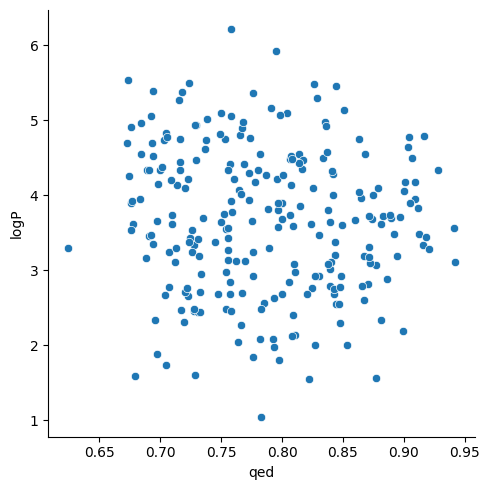

In [86]:
sns.relplot(data = df, x = 'qed', y = 'logP')

## KBest with cv

In [22]:
def feature_selection_cv(X, y, features: list, n_features = 2):

    r2_values = []

    for n_feat in tqdm(range(1, n_features+1)):

        combs = itertools.combinations(features, n_feat)

        for feature_subset in combs:

            model = linear_model.LinearRegression()

            X_train = X[[*feature_subset]]

            coeff = cross_val_score(model, X_train , y, cv = kf).mean()   #выбор r2 заменен на среднее значение
            r2_values.append((n_feat, coeff, ' '.join(feature_subset)))

    r2_df = pd.DataFrame(r2_values, columns=['n', 'r2', 'cols'])

    return r2_df.groupby('n').max()


In [23]:
res2 = feature_selection_cv(X_new, y, feats2)
res2

100%|██████████| 2/2 [00:07<00:00,  3.69s/it]


,r2,cols
n,,
1,0.301660,fr_benzene
2,0.359316,fr_aryl_methyl fr_benzene


In [24]:
res3 = feature_selection_cv(X_new, y, feats2, 3)
res3

100%|██████████| 3/3 [02:04<00:00, 41.38s/it]


,r2,cols
n,,
1,0.301660,fr_benzene
2,0.359316,fr_aryl_methyl fr_benzene
3,0.404541,fr_ArN fr_aryl_methyl fr_benzene
